In [1]:
from tfumap.load_datasets import load_CIFAR10, mask_labels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import pandas as pd

In [3]:
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = load_CIFAR10(flatten=False)
X_train.shape

(40000, 32, 32, 3)

In [4]:
lpc_list = [1,4,16,64,256,1024]

In [5]:
X_train_flat = np.reshape(X_train, (len(X_train), np.product(np.shape(X_train)[1:])))

In [6]:
loc_df = pd.DataFrame(columns = ['nex', 'z'])
loc_df['z'] = loc_df['z'].astype(object)

for labels_per_class in lpc_list:
    if labels_per_class == "full":
        X_labeled = X_train
        Y_masked = Y_labeled = Y_train
    else:
        X_labeled, Y_labeled, Y_masked = mask_labels(
            X_train, Y_train, labels_per_class=labels_per_class
        )
    z = umap.UMAP(verbose=True,target_weight=1.0).fit_transform(X_train_flat, Y_masked)
    loc_df.loc[len(loc_df)] = [labels_per_class, z]
loc_df

UMAP(dens_frac=0.0, dens_lambda=0.0, target_weight=1.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug  7 15:42:43 2020 Finding Nearest Neighbors
Fri Aug  7 15:42:43 2020 Building RP forest with 15 trees
Fri Aug  7 15:42:46 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Fri Aug  7 15:42:58 2020 Finished Nearest Neighbor Search
Fri Aug  7 15:43:01 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug  7 15:43:48 2020 Finished embedding
UMAP(dens_frac=0.0, dens_lambda=0.0, target_weight=1.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug  7 15:43:50 2020 Finding Nearest Neighbors
Fri Aug  7 15:43:50 2020 Building RP forest with 15 trees


,nex,z
0,1,"[[2.4282377, 0.19800286], [6.118775, -0.668957..."
1,4,"[[2.6471794, 1.7326455], [6.5525126, 2.1533895..."
2,16,"[[2.3649533, 1.1352961], [6.437403, 1.9872959]..."
3,64,"[[2.7312365, 1.6231807], [6.541682, 2.12833], ..."
4,256,"[[2.6330395, 0.3587477], [6.2261577, -0.693724..."
5,1024,"[[2.7605596, 1.3913851], [6.0668106, 2.0353155..."


In [7]:
from scipy.spatial import procrustes

In [8]:
z0 = loc_df.loc[5, 'z']

In [9]:
from tfumap.paths import FIGURE_DIR, save_fig, ensure_dir

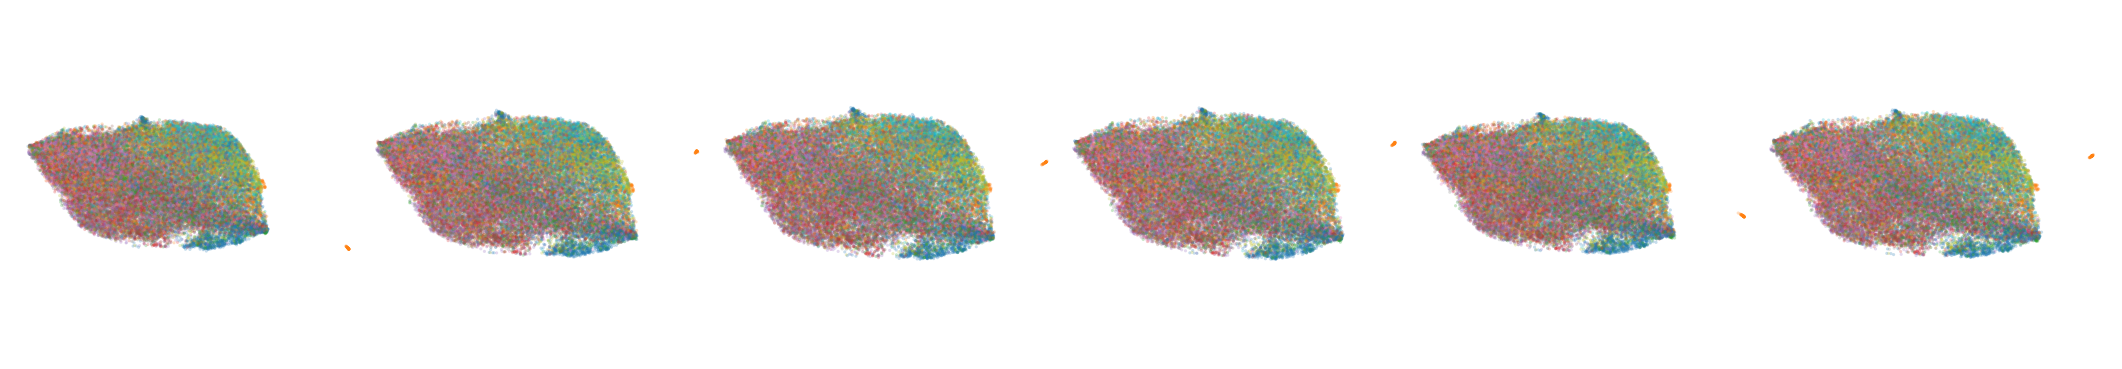

In [10]:
fig, axs = plt.subplots(ncols=6, figsize=(18, 3), dpi=150, gridspec_kw = {'wspace':0, 'hspace':0})
for i, (idx, row) in enumerate(loc_df.iterrows()):
    z = row.z
    z0_align, z_align, disparity = procrustes(z0, z)
    ax = axs[i]
    ax.scatter(
        z_align[:, 0], 
        z_align[:, 1], 
        s=0.25,
        c=Y_train, 
        cmap=plt.cm.tab10, 
        alpha = 0.25,
        rasterized=True
    )
    ax.axis("equal")
    n = 0.1
    xmin = np.percentile(z_align[:, 0], n)
    xmax = np.percentile(z_align[:, 0], 100 - n)
    ymin = np.percentile(z_align[:, 1], n)
    ymax = np.percentile(z_align[:, 1], 100 - n)
    # print(xmin, xmax, xmin, ymax)
    xdiff = (xmax - xmin) / 20
    ydiff = (ymax - ymin) / 20
    xmin = xmin - xdiff
    xmax = xmax + xdiff
    ymin = ymin - ydiff
    ymax = ymax + ydiff

    # print(xmin, xmax, xmin, ymax)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

    ax.axis("off")
ensure_dir(FIGURE_DIR / 'semisupervised-projections')
save_fig(FIGURE_DIR / 'semisupervised-projections' / 'cifar10-euclidean', save_pdf=True)

In [12]:
z = umap.UMAP(verbose=True,target_weight=1.0).fit_transform(X_train_flat, Y_train)

UMAP(dens_frac=0.0, dens_lambda=0.0, target_weight=1.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug  7 16:09:13 2020 Finding Nearest Neighbors
Fri Aug  7 16:09:13 2020 Building RP forest with 15 trees
Fri Aug  7 16:09:15 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Fri Aug  7 16:09:19 2020 Finished Nearest Neighbor Search
Fri Aug  7 16:09:19 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug  7 20:20:14 2020 Finished embedding


(-11.602352939170464,
 13.41372283510552,
 -18.731122924406094,
 17.925676299650235)

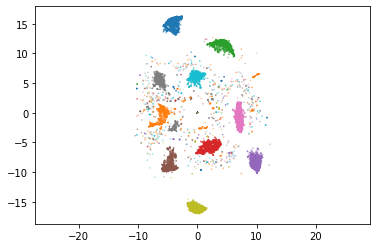

In [13]:
fig, ax = plt.subplots()
ax.scatter(
    z[:, 0], 
    z[:, 1], 
    s=0.25,
    c=Y_train, 
    cmap=plt.cm.tab10, 
    alpha = 0.25,
    rasterized=True
)
ax.axis("equal")